In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [7]:
trainset = pd.read_csv('train.csv')
trainset.pop('Id')
y = trainset.pop('y').values
X = trainset.values


alphas = [0.01, 0.1, 1, 10, 100]

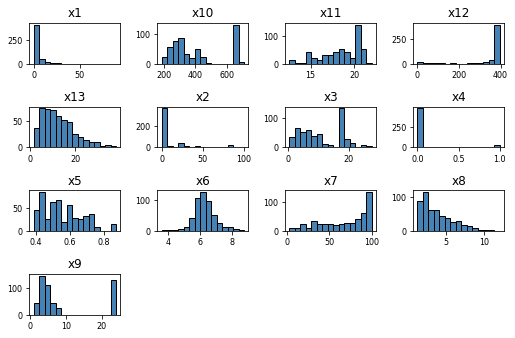

In [8]:
trainset.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  

In [36]:
kf = KFold(n_splits=10)

res = []
for alpha in alphas:
    RMSE = 0
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = Ridge(alpha=alpha, normalize=True)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        MSE = mean_squared_error(y_pred, y_test)
        RMSE += np.sqrt(MSE)
    RMSE /= 10
    res = np.append(res, RMSE)


In [37]:
submission = pd.DataFrame(res)
print(submission)
submission.to_csv('submission.csv', header=False, index=False)

          0
0  4.791610
1  4.829519
2  5.531317
3  7.643185
4  8.899362
